In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv('./data/CV_GRU_UNITSHAN_5_FOLDS_BATCH_256.csv', index_col=[0])

In [5]:
df2 = pd.read_csv('./data/CV_GRU_UNITSHAN_5_FOLDS.csv', index_col=[0])

In [6]:
df = pd.concat([df1, df2])

In [17]:
loss_list = []
accuracy_list = []
gru_units_list = []
gru_units = df.groupby('gru_units')[['accaury','loss']].mean()
print(f'Using {gru_units.index.values} batch sizes with {df.epochs.max()} epochs the mean accaury and loss are:')
for index, row in gru_units.iterrows():
    print(f'For {index} GRU unit the mean accuary is: {round(row.accaury, 3)} and the mean loss is: {round(row.loss, 3)}.')
    loss_list.append(row.loss)
    accuracy_list.append(row.accaury)
    gru_units_list.append(index)

Using [ 16  32  64 100 128 256] batch sizes with 30 epochs the mean accaury and loss are:
For 16 GRU unit the mean accuary is: 0.883 and the mean loss is: 0.326.
For 32 GRU unit the mean accuary is: 0.894 and the mean loss is: 0.289.
For 64 GRU unit the mean accuary is: 0.908 and the mean loss is: 0.283.
For 100 GRU unit the mean accuary is: 0.876 and the mean loss is: 0.391.
For 128 GRU unit the mean accuary is: 0.901 and the mean loss is: 0.3.
For 256 GRU unit the mean accuary is: 0.901 and the mean loss is: 0.309.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


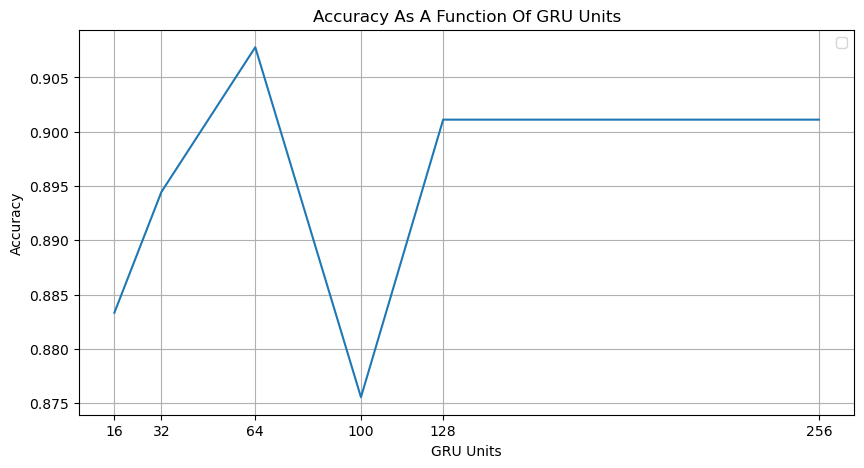

In [29]:
# gru_units_list
# plt.plot(gru_units_list,loss_list)
plt.plot(gru_units_list,accuracy_list)
plt.xticks(ticks=gru_units_list)
plt.xlabel('GRU Units')
plt.grid()
plt.ylabel('Accuracy')
plt.title(f'Accuracy As A Function Of GRU Units')
plt.legend()

In [32]:
df['fold'] = df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)

In [34]:
learning_data = []
for i in range(df.shape[0]):
    raw_data_string = df.history_df.iloc[i].replace('{', '').replace('}', '').replace('\'', '')
    loss_string_data = raw_data_string.split('[')[1].split(']')[0].replace(' ', '').split(',')
    acc_string_data = raw_data_string.split('[')[2].split(']')[0].replace(' ', '').split(',')
    loss = (np.array(loss_string_data)).astype(float)
    acc = (np.array(acc_string_data)).astype(float)
    gru_units = df.iloc[i].gru_units
    for epoch in range(len(acc)):
        epoch_data = {
            "fold": i+1,
            "epoch": epoch+1,
            "loss": loss[epoch],
            "acc": acc[epoch],
            "gru_units": gru_units
        }
        learning_data.append(epoch_data)
training_df = pd.DataFrame(learning_data)

# 16 GRU Units

In [ ]:
gru_units = 16

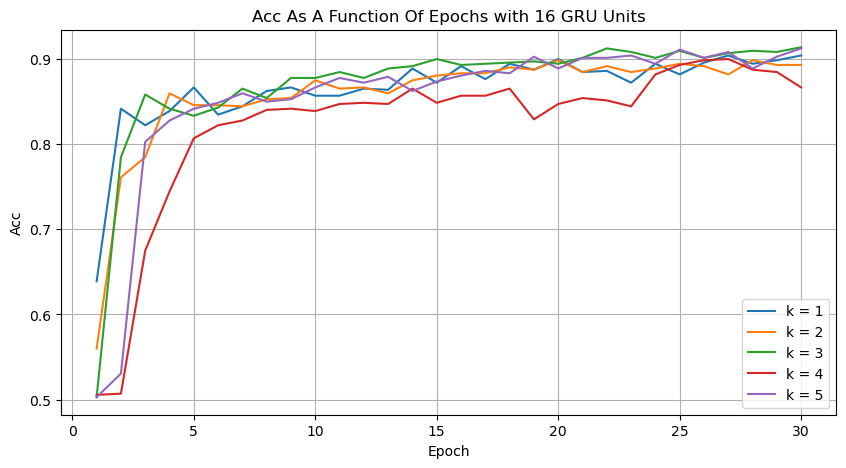

In [38]:
epoch_df = training_df[training_df.gru_units == gru_units]
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

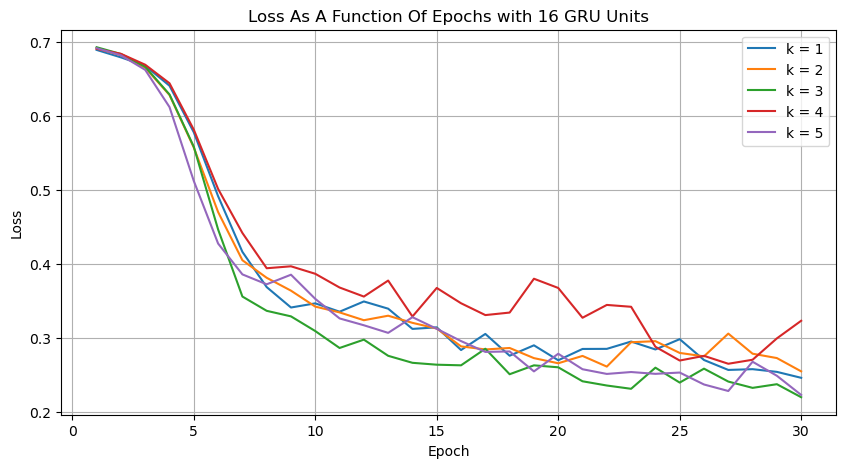

In [39]:
epoch_df = training_df[training_df.gru_units == gru_units]
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

# 32 GRU Units

In [40]:
gru_units = 32

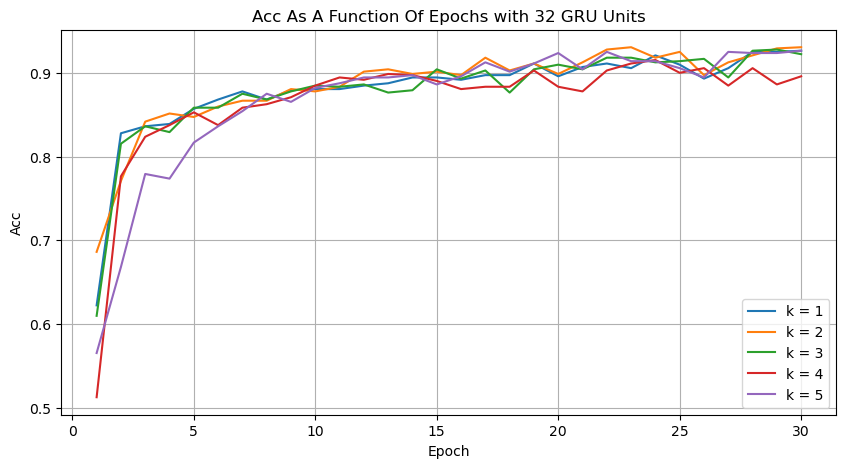

In [52]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

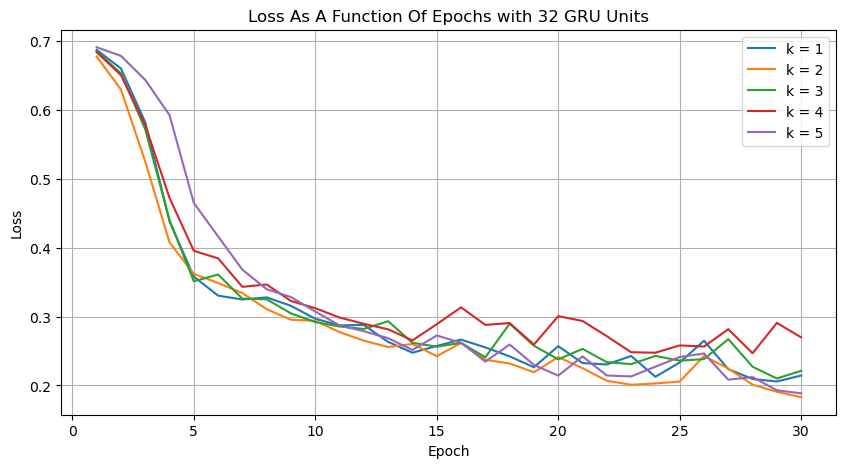

In [54]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

# 64 GRU Units

In [79]:
gru_units = 64

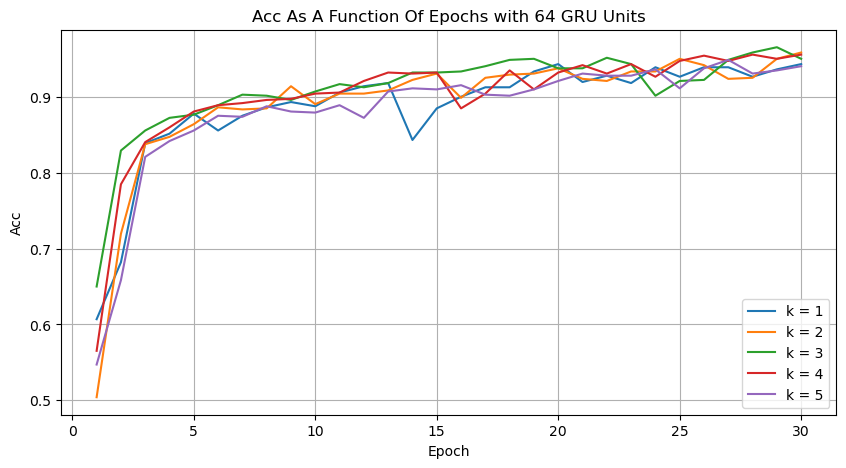

In [80]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

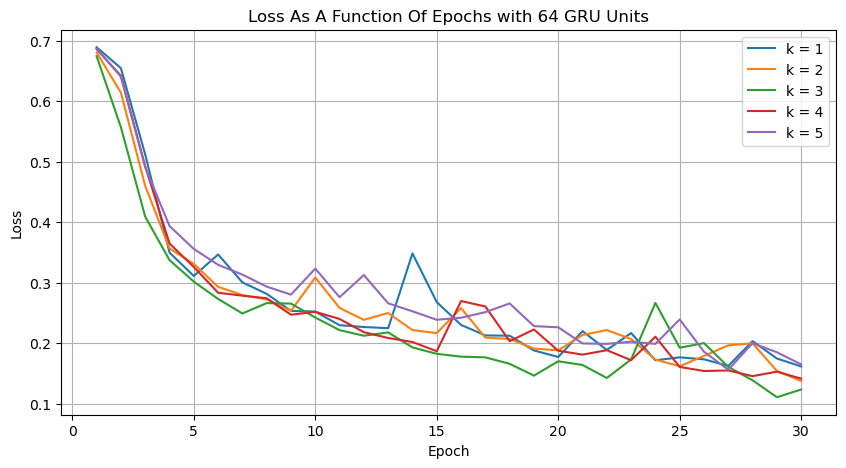

In [81]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

# 100 GRU Units

In [57]:
gru_units = 100

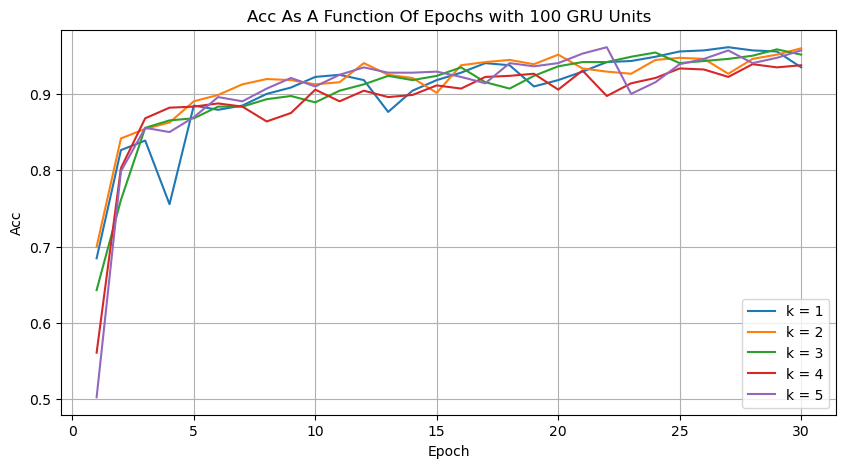

In [58]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

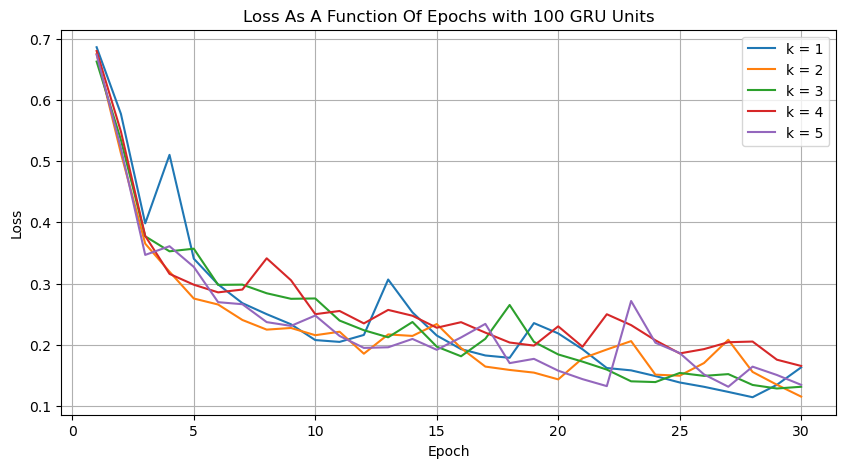

In [59]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

# 128 GRU Units

In [71]:
gru_units = 128

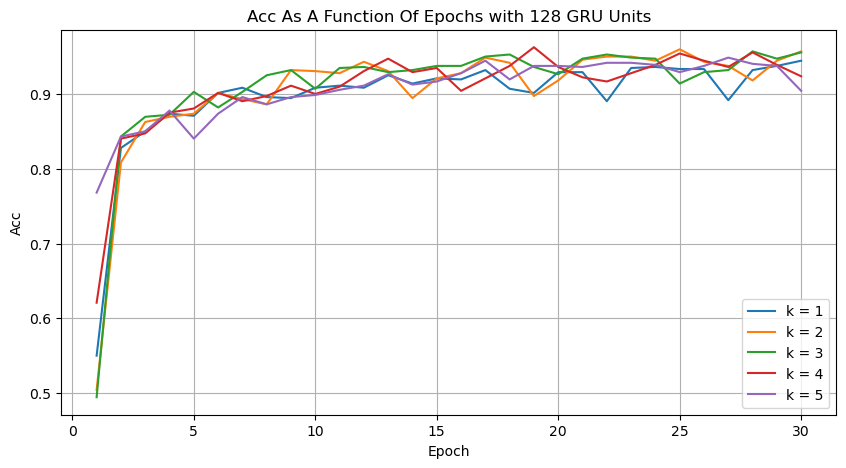

In [61]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

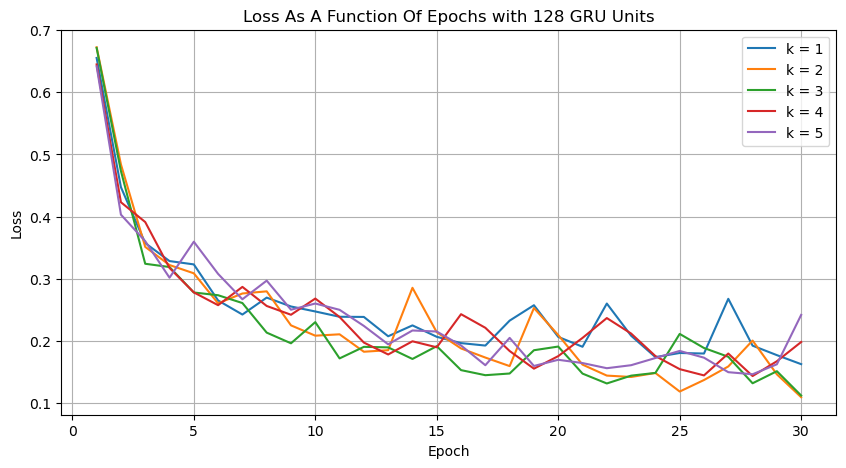

In [62]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

# 256 GRU Units

In [74]:
gru_units = 256

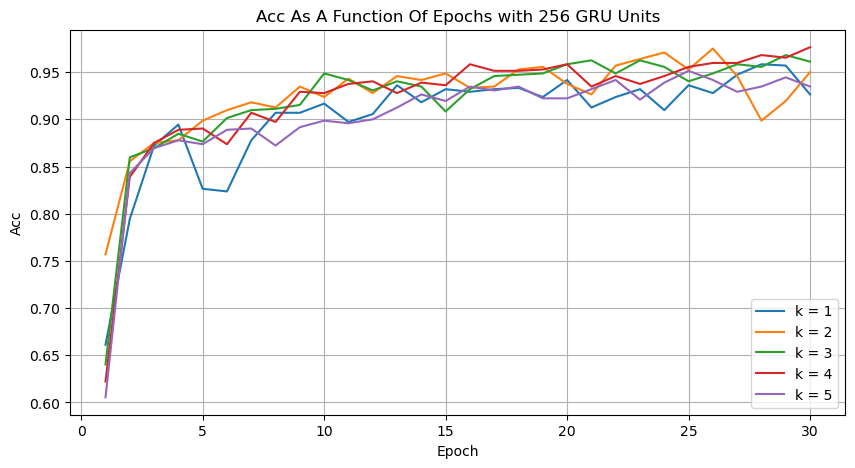

In [75]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20 if 20<x<26 else x-25)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

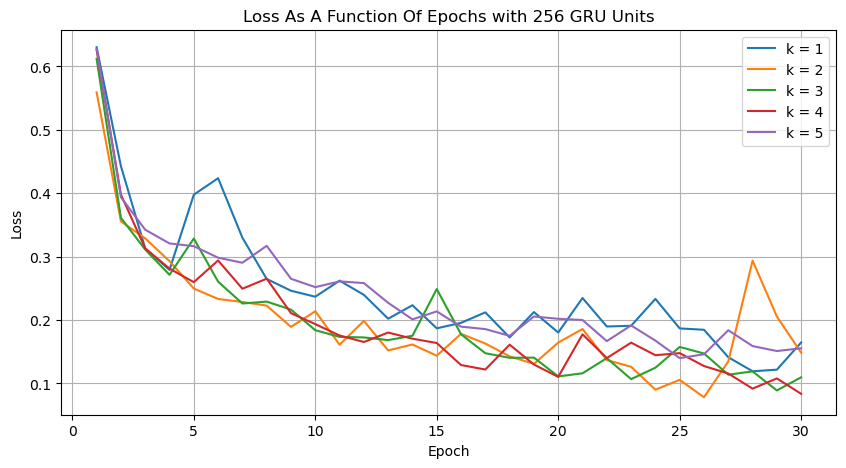

In [77]:
epoch_df = training_df[training_df.gru_units == gru_units]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<6 else x-5 if 5<x<11 else x-10 if 10<x<16 else x-15 if 15<x<21 else x-20 if 20<x<26 else x-25)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with {gru_units} GRU Units')
plt.legend()
plt.show()

# Summary

In [82]:
plt.rcParams['figure.figsize'] = [5, 2.5]

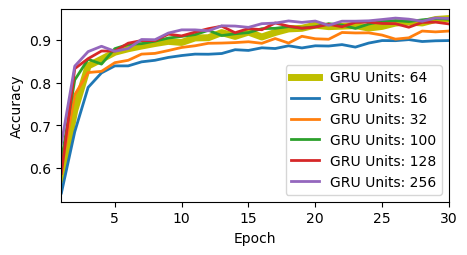

In [92]:
gru_units = [64,16,32,100,128,256]
for gru_unit in gru_units:
    epoch_df = training_df[training_df.gru_units == gru_unit]
    target = 'acc'
    x = epoch_df.epoch.unique()
    y = epoch_df.groupby(['epoch'])[target].mean()
    linewidth = 5 if gru_unit == 64  else 2
    color = 'y' if gru_unit == 64  else None
    plt.plot(x, y, linewidth=linewidth, label=f'GRU Units: {gru_unit}', color=color)
    plt.xlabel('Epoch')
    plt.grid()
    plt.xlim([1, 30])
    plt.ylabel('Accuracy')
#     plt.title('Average Accuracy As A Function Of GRU Units Over 30 Ephoces')
    plt.legend()
plt.show()

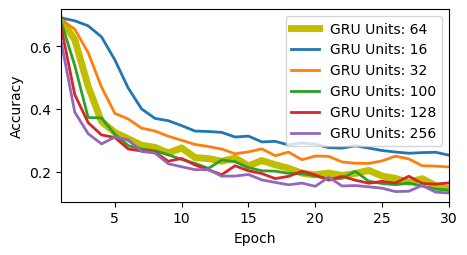

In [93]:
gru_units = [64,16,32,100,128,256]
for gru_unit in gru_units:
    epoch_df = training_df[training_df.gru_units == gru_unit]
    target = 'loss'
    x = epoch_df.epoch.unique()
    y = epoch_df.groupby(['epoch'])[target].mean()
    linewidth = 5 if gru_unit == 64  else 2
    color = 'y' if gru_unit == 64  else None
    plt.plot(x, y, linewidth=linewidth, label=f'GRU Units: {gru_unit}', color=color)
    plt.xlabel('Epoch')
    plt.grid()
    plt.xlim([1, 30])
    plt.ylabel('Accuracy')
#     plt.title('Average Accuracy As A Function Of GRU Units Over 30 Ephoces')
    plt.legend()
plt.show()